# Recap Session 3 Spring 2021

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.optimize as opt
import numpy.polynomial.polynomial as poly

### fit data with a linear trend

####### Generate linear data in x and y #####


y = mx + b

In [5]:
x = np.arange(1, 25, 1)
y = 3*x + 10

########## add noise to y #####


In [6]:
mu = 0 
sigma = 8

y2 = y + np.random.normal(mu, sigma, y.size)

Fit data+noise with polynomial for y=ax+b

In [10]:
const = np.polyfit(x, y2, 1)

y_fit = const[0]*x + const[1]

__Plot data__

x vs y_fit
x vs y
x vs y2

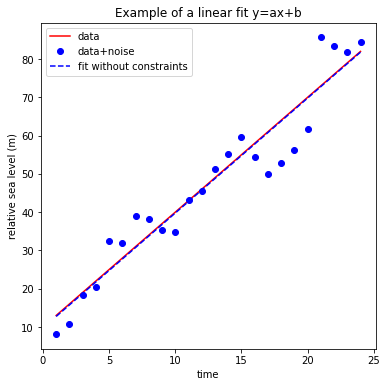

In [17]:
f1 = plt.figure(figsize=(6,6)) # Obtain figure handle

plt.title('Example of a linear fit y=ax+b')

plt.plot(x, y, '-r', label = 'data')
plt.plot(x, y2, 'ob', label = 'data+noise')
plt.plot(x, y_fit, '--b', label='fit without constraints')
plt.xlabel('time')
plt.ylabel('relative sea level (m)')

plt.legend()

plt.show()


### Part 2

we continue using python to fit a linear trend,  
but now we constrain the the fit to go through point (0, 10)

Generate clean linear data in x and y


In [ ]:
x = np.linspace(0,25,25)
y = 3.14*x + 10

Add noise to y


In [51]:
mu = 0.0
sigma = 8
y2 = y + np.random.normal(mu,sigma,y.size)

Fit data+noise with polynomial for y=ax+b


In [52]:
const1 = np.polyfit(x,y2,1)
y_fit1 = const1[0]*x + const1[1]

### Fit data+noise with y=ax+b & forcing fit through (0,4.5)

How?  One option is to shift all the data so that the constraint point is at (0,0)  
and we then use the equation y=a*(x-x0) + y0 for the fit.

In [24]:
pt = [0.0,4.5]

define the function we want to fit


In [25]:
def func(x, a):
    return a*(x-pt[0]) + pt[1]

Perform fit

In [27]:
const2 = opt.curve_fit(func, x, y)
y_fit2 = const2[0] * (x-pt[0]) + pt[1]

############## Plot Data ################

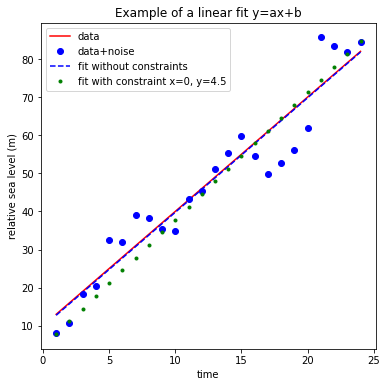

In [28]:
f1 = plt.figure(figsize=(6,6)) # Obtain figure handle

plt.title('Example of a linear fit y=ax+b')

plt.plot(x, y, '-r', label = 'data')
plt.plot(x, y2, 'ob', label = 'data+noise')
plt.plot(x, y_fit, '--b', label='fit without constraints')
plt.plot(x, y_fit2, '.g', label='fit with constraint x=0, y=4.5')

plt.xlabel('time')
plt.ylabel('relative sea level (m)')

plt.legend()

plt.show()

# part 3

fit data with a function y=A*exp(Bx)

We can transform the equation y = A*exp(Bx) to a linear equation  
by taking the natural log of both sides. This results in   
 ln(y) = Bx + ln(A) 
 
 this is equivalent to Y=CX+D  

################# Generate clean data #########


In [29]:
x = np.linspace(0, 10, 20)
y = 0.2 * np.exp(0.5 * x)

############### Add noise to y ##########


In [30]:
mu = 0.0
sigma = 0.25
y2 = y * (1 + np.random.normal(mu, sigma, y.size))


############## Transform y using log

In [34]:
y3 = np.log(y2)

############## Fit data+noise with polynomial of the for y=ax+b

Best-fitting line = line for which the sum of squared distances between data and that line is smallest

y = mx + b 

const[0] = m  
const[1] = b

In [37]:
const = np.polyfit(x, y3, 1)
y_fit1 = const[0]*x + const[1]

The exponential fit of the original equation

In [39]:
A = np.exp(const[1])
B = const[0]
y_fit2 = A * np.exp(B*x)

############## Plot Data  
Fit of transformation

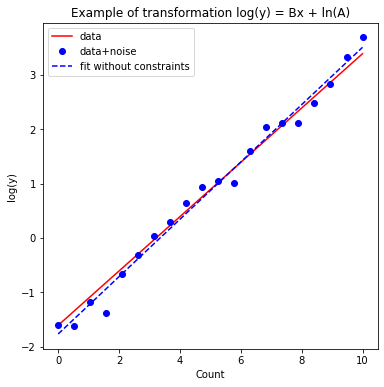

In [40]:
f1 = plt.figure(figsize=(6,6)) # Obtain figure handle
plt.title('Example of transformation log(y) = Bx + ln(A)')
plt.xlabel('Count')
plt.ylabel('log(y)')

plt.plot(x, np.log(y), '-r', label='data')
plt.plot(x, y3, 'ob', label = 'data+noise')
plt.plot(x, y_fit1, '--b', label='fit without constraints')

plt.legend()

Fit of original equation


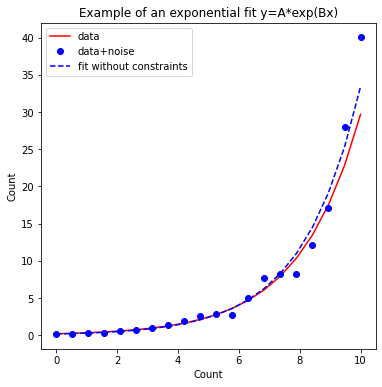

In [41]:
#Fit of original equation
f2 = plt.figure(figsize=(6,6)) # Obtain figure handle
plt.title('Example of an exponential fit y=A*exp(Bx)')
plt.xlabel('Count')
plt.ylabel('Count')

plt.plot(x,y,'-r',label = 'data')
plt.plot(x,y2,'ob',label = 'data+noise')
plt.plot(x,y_fit2,'--b',label='fit without constraints')

plt.legend()

plt.show()

## This is called 'Ordinary Least Squares'

OLS assumes that the uncertainty on each data point is the same. 
The fancy stats term for this is homoskedasticity.

If all uncertainties not the same, we use:  __Weighted Least Squares__
